In [ ]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 7.8 MB/s 
     |████████████████████████████████| 133 kB 62.1 MB/s 


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

DIR_PATH = '/content/drive/MyDrive/SUTD/AI'

os.chdir(DIR_PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from matplotlib import pyplot as plt
import autokeras as ak

In [ ]:
TRAIN_PATH = os.path.join(DIR_PATH, 'datasets/train_textcleaned.csv')
TEST_PATH = os.path.join(DIR_PATH, 'datasets/test_textcleaned.csv')

train_df = pd.read_csv(TRAIN_PATH)
train_df = train_df.drop(['Unnamed: 0'], axis=1)
train_df.head()

test_df = pd.read_csv(TEST_PATH)
test_df = test_df.drop(['Unnamed: 0'], axis=1)
test_df.head()

,tweet,label
0,What to Know About Thyroid and Alzheimer's,1
1,"一瞬「？」でしたが、なるほどプリオンの絡みか。 Alzheimer, Parkinson D...",1
2,Encouraging!!! Study reveals what causes Alzhe...,1
3,Taking statins for 6 months reduces risk of Al...,1
4,The Telegraph will give £1 to Alzheimer's Rese...,1


In [ ]:
x_train = np.array(train_df.tweet)
y_train = np.array(train_df.label)

x_test = np.array(test_df.tweet)
y_test = np.array(test_df.label)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(3175,)
(3175,)


In [ ]:
def convert_onehot(lst):
  onehot = list()
  for i in lst:
    temp = np.zeros(3)
    temp = np.insert(temp, i, 1)
    onehot.append(temp)

  return np.array(onehot)

y_train = convert_onehot(y_train)

In [ ]:
# MODEL_PATH = os.path.join(DIR_PATH, 'models/model_autokeras_1')
MODEL_PATH = os.path.join(DIR_PATH, 'models/model_autokeras_1/model_autokeras_1.h5')

# imported = tf.saved_model.load(MODEL_PATH)

In [ ]:
model = tf.keras.models.load_model(MODEL_PATH, compile=True)
model.summary()

245760/231508 [===============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 expand_last_dim (ExpandLastDim  (None, 1)           0           ['input_1[0][0]']                
 )                                                                                                
                                                                                                  
 bert_tokenizer (BertTokenizer)  ((None, None),      0           ['expand_last_dim[0][0]']        
                                 (None, None),                                                    
                                

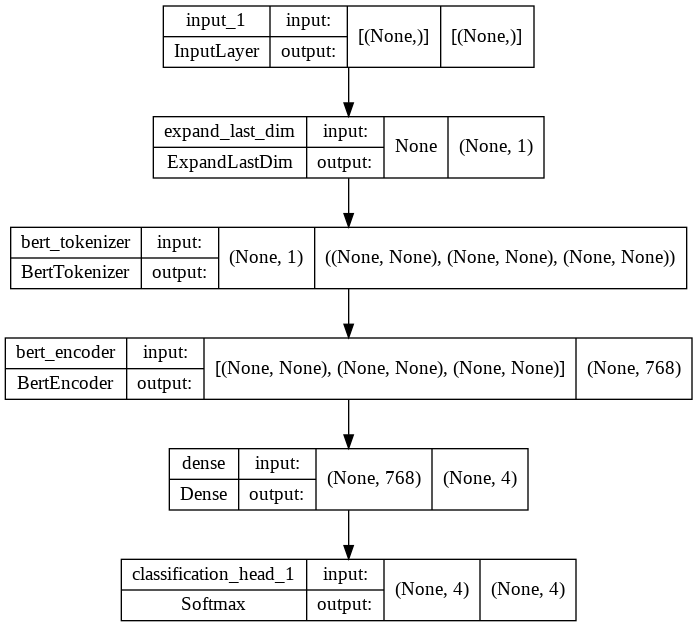

In [ ]:
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
history = model.fit(x_train, y_train, validation_split=0.3, epochs=300)

Epoch 1/300
70/70 [==============================] - 43s 370ms/step - loss: 0.1124 - accuracy: 0.9640 - val_loss: 0.2378 - val_accuracy: 0.9265
Epoch 2/300
70/70 [==============================] - 25s 363ms/step - loss: 0.0815 - accuracy: 0.9779 - val_loss: 0.3169 - val_accuracy: 0.9003
Epoch 3/300
70/70 [==============================] - 26s 369ms/step - loss: 0.0439 - accuracy: 0.9892 - val_loss: 0.3234 - val_accuracy: 0.9119
Epoch 4/300
70/70 [==============================] - 27s 385ms/step - loss: 0.0307 - accuracy: 0.9914 - val_loss: 0.3309 - val_accuracy: 0.9150
Epoch 5/300
70/70 [==============================] - 26s 371ms/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.3766 - val_accuracy: 0.9045
Epoch 6/300
70/70 [==============================] - 26s 374ms/step - loss: 0.0099 - accuracy: 0.9973 - val_loss: 0.3836 - val_accuracy: 0.9056
Epoch 7/300
70/70 [==============================] - 26s 373ms/step - loss: 0.0074 - accuracy: 0.9982 - val_loss: 0.3700 - val_accuracy:

In [ ]:
y_pred = model.predict(x_test, verbose=1)
print(y_pred)

43/43 [==============================] - 6s 105ms/step
[[2.50731246e-05 9.99951959e-01 1.00093885e-05 1.30068092e-05]
 [6.13007433e-05 9.99909282e-01 1.72770033e-05 1.21179492e-05]
 [4.34559370e-05 9.99929428e-01 1.80356783e-05 9.06272726e-06]
 ...
 [9.99639869e-01 6.75190022e-05 2.61943991e-04 3.06604597e-05]
 [9.99016881e-01 5.56688407e-04 2.38285182e-04 1.88185135e-04]
 [9.97086346e-01 1.77052803e-03 9.39642196e-04 2.03485106e-04]]


In [ ]:
y_test = convert_onehot(y_test)
loss_and_metrics = model.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

43/43 - 4s - loss: 0.6692 - accuracy: 0.8780 - 4s/epoch - 104ms/step
Test Loss 0.6692125797271729
Test Accuracy 0.8780308365821838


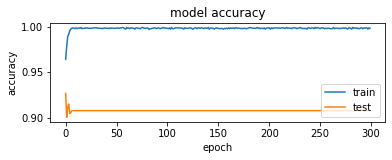

In [ ]:
# plot accuracy metrics
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

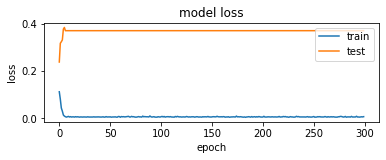

In [ ]:
# plot loss metrics
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [ ]:
# save model
model.save("models/retrained/model_2.h5")